In [10]:
from osgeo import ogr,osr

In [30]:
driver=ogr.GetDriverByName("ESRI Shapefile")
ds=driver.CreateDataSource("polygonwithhole1.shp")
srs=osr.SpatialReference()
srs.ImportFromEPSG(4326)
layer=ds.CreateLayer("polygonwithhole1",srs,ogr.wkbPolygon)
layer.CreateField(ogr.FieldDefn("id",ogr.OFTInteger))
layer_defn=layer.GetLayerDefn()
feature=ogr.Feature(layer_defn)
feature.SetField("id",1)
polygon=ogr.Geometry(ogr.wkbPolygon)
outer_ring=ogr.Geometry(ogr.wkbLinearRing)
outer_ring.AddPoint(87.33,26.98)
outer_ring.AddPoint(87.21,26.11)
outer_ring.AddPoint(87.65,26.44)
outer_ring.AddPoint(87.33,26.98)
polygon.AddGeometry(outer_ring)
inner_ring=ogr.Geometry(ogr.wkbLinearRing)
inner_ring.AddPoint(87.30,26.11)
inner_ring.AddPoint(87.25,26.1)
inner_ring.AddPoint(87.60,26.11)
inner_ring.AddPoint(87.30,26.95)
polygon.AddGeometry(inner_ring)
feature.SetGeometry(polygon)
layer.CreateFeature(feature)
feature = None
ds = None



In [45]:
ds=ogr.Open("linestring111.shp",0)
layer=ds.GetLayer()
feature=layer.GetFeature(0)
geom=feature.GetGeometryRef()
print(geom.GetGeometryName())
print(geom.GetGeometryType())
print(geom.GetGeometryCount())
print(geom.ExportToWkt())

LINESTRING
2
0
LINESTRING (87.33 26.98,87.21 26.11,87.65 26.44)


In [8]:
ds=ogr.Open(r"D:\shapefiles\cadastre_project.shp",0)
layer=ds.GetLayer()
layer_defn=layer.GetLayerDefn()
field_name=[layer_defn.GetFieldDefn(i).GetName()for i in range(layer_defn.GetFieldCount())]
count=0
for feature in layer:
 
    for name in field_name:
        print(f"{name}:{feature.GetField(name)}")
    geom=feature.GetGeometryRef()
    print(geom.ExportToWkt())
    count+=1
    if count>=2:
        break


id:1
owner:kiran
land_class:commercial
title_id:1591
POLYGON ((88.1907485404766 26.5019563148539,88.191300839865 26.5019742415002,88.1914782624665 26.5016387566563,88.1907714337155 26.5016003422987,88.1907485404766 26.5019563148539))
id:2
owner:rohan
land_class:commerical
title_id:1592
POLYGON ((88.1907542637863 26.5019511929545,88.1907714337155 26.5016029032562,88.1901676245395 26.5015900984678,88.1901418696458 26.5020152166812,88.1907542637863 26.5019511929545))


In [17]:
ds=ogr.Open("polygon.shp",0)
layer=ds.GetLayer()
feature=layer.GetFeature(0)
geom=feature.GetGeometryRef()
srs=layer.GetSpatialRef()
target=osr.SpatialReference()
target.ImportFromEPSG(32645)
coordinate_transform=osr.CoordinateTransformation(srs, target)
for feature in layer:
    geom=feature.GetGeometryRef()
    geom.Transform(coordinate_transform)
    print(geom.ExportToWkt())
    print(geom.GetArea())

POLYGON ((532746.909682898 2984262.84597156,564807.087651388 2924576.23041496,520996.72786921 2887882.67031243,532746.909682898 2984262.84597156))
1895647084.4498901


In [18]:
from osgeo import gdal

In [22]:
file=gdal.Open(r"D:\shapefiles\LC09_L1TP_142041_20231113_20231114_02_T1\LC09_L1TP_142041_20231113_20231114_02_T1_B5.TIF")
cols=file.RasterXSize
rows=file.RasterYSize
gt=file.GetGeoTransform()
proj=file.GetProjection()
print(cols,rows,gt,proj)
x=gt[1]
y=abs(gt[5])
print(f"pixel size in x direction: {x}")
print(f"pixel size in y direction: {y}")
# printing the extent of the raster
min_x=gt[0]
max_y=gt[3]
max_x=gt[0] + cols * x
min_y=gt[3] + rows * y
print(f"raster extent in x direction: {min_x} to {max_x}")
print(f"raster extent in y direction: {min_y} to {max_y}")


7531 7681 (657285.0, 30.0, 0.0, 3151815.0, 0.0, -30.0) PROJCS["WGS 84 / UTM zone 44N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32644"]]
pixel size in x direction: 30.0
pixel size in y direction: 30.0
raster extent in x direction: 657285.0 to 883215.0
raster extent in y direction: 3382245.0 to 3151815.0


1
(657285.0, 30.0, 0.0, 3151815.0, 0.0, -30.0)
PROJCS["WGS 84 / UTM zone 44N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32644"]]
stacked successfully


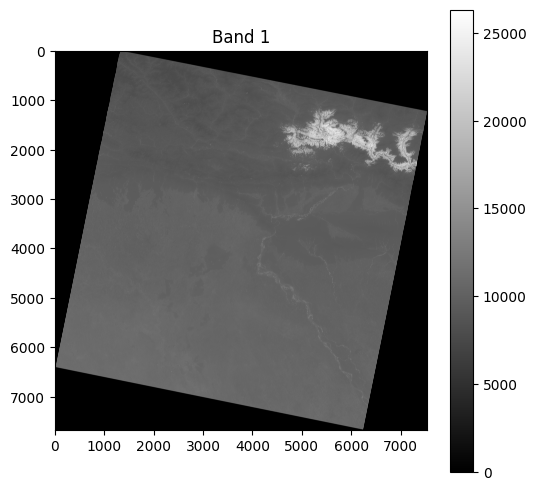

In [26]:
#stacking
from osgeo import gdal
import matplotlib.pyplot as plt
bands=[r"D:\shapefiles\LC09_L1TP_142041_20231113_20231114_02_T1\LC09_L1TP_142041_20231113_20231114_02_T1_B1.TIF",r"D:\shapefiles\LC09_L1TP_142041_20231113_20231114_02_T1\LC09_L1TP_142041_20231113_20231114_02_T1_B2.TIF",r"D:\shapefiles\LC09_L1TP_142041_20231113_20231114_02_T1\LC09_L1TP_142041_20231113_20231114_02_T1_B3.TIF"]
info=gdal.Open(bands[0])
count=info.RasterCount
print(count)
print(info.GetGeoTransform())
print(info.GetProjection())
driver=gdal.GetDriverByName("GTiff")
ds=driver.Create(r"D:\shapefiles\stacked.tif",info.RasterXSize,info.RasterYSize,len(bands),gdal.GDT_Float32)
ds.SetGeoTransform(info.GetGeoTransform())
ds.SetProjection(info.GetProjection())
for i,f in enumerate(bands):
    arr=gdal.Open(f).ReadAsArray()
    ds.GetRasterBand(i+1).WriteArray(arr)
    
print("stacked successfully")
for i in range(1, count+1):
    band = ds.GetRasterBand(i)
    arr = band.ReadAsArray()
    
    plt.figure(figsize=(6,6))
    plt.imshow(arr, cmap='gray')
    plt.title(f'Band {i}')
    plt.colorbar()
    plt.show()